# Task 1 

In [1]:
#import used libraires
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import re 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",200)
plt.style.use('fivethirtyeight')

In [2]:
#read transactions data
transaction=pd.read_excel(r'C:\Users\ELHODA\Downloads\QVI_transaction_data.xlsx')
transaction=transaction.sort_values(by='DATE')

#read behaviour data
behaviour=pd.read_csv(r'C:\Users\ELHODA\Downloads\QVI_purchase_behaviour.csv')


# Prepare transaction data

In [3]:
#See first 5 rows 
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
100938,2018-07-01,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4


### Prepare PROD_NAME featrure 

#### Extract digits 

In [4]:
#Extract numbers from product names and put them in weight feature
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

transaction['PACK_SIZE']=transaction.PROD_NAME.apply(lambda x: find_number(x)).astype(int)

In [5]:
print('Max Packet Size is {} \nMin Packet Size is {} .'.format(transaction.PACK_SIZE.max(),transaction.PACK_SIZE.min()))

Max Packet Size is 380 
Min Packet Size is 70 .


Split packet size of each product to get best insights and recommendations based on backet size feature.

#### Drop special characters

In [6]:
prod_name = list(transaction['PROD_NAME'])

# replace Special characters
for i in range(len(transaction['PROD_NAME'])):
    prod_name[i] = prod_name[i].replace('/', ' ')
    prod_name[i] = prod_name[i].replace('&', ' ')
    
transaction['PROD_NAME']=prod_name

#### Drop Salsa products

In [7]:
#Remove not-chips products like Salsa products
transaction = transaction[~transaction["PROD_NAME"].str.contains("[Ss]alsa")]

#### Correct brand names 

In [8]:
#Extract brands names from product names feature
transaction["Brand"] = transaction["PROD_NAME"].str.split().str[0]

print('Transaction Brand Unique{} \n  Number of unique brands is {} .'.format(transaction.Brand.unique(),transaction.Brand.nunique()))

#Replace all these wrong names with unique and correct names
Wrong_names=['Natural'               , 'NCC'                ,'CCs'  ,'Smith'  ,'Smiths'  ,'Snbts'    ,'GrnWves'    ,'Grain'      ,'Dorito' ,'Infzns','Red','WW']
Correct_names=['Natural Chip Company','Natural Chip Company','CC\'s','Smith\'s','Smith\'s','Sunbites','Grain Waves','Grain Waves','Doritos','Infuzions'
              ,'RRD','Woolworths']
# Create Function for correct wrong names
def Brand_Names_Corrector (df,Prodcut_Name,Brand_Name,Wrong_names,Correct_names):
    df[Prodcut_Name.str.contains(Wrong_names)]
    Brand_Name.replace(Wrong_names,Correct_names,inplace=True)
    
    
for i in range(len(Wrong_names)):
    Brand_Names_Corrector(transaction,transaction.PROD_NAME,transaction.Brand,Wrong_names[i],Correct_names[i])

print('*'*80)
print('Transaction Brand Unique{} \n  Number of unique brands is {} .'.format(transaction.Brand.unique(),transaction.Brand.nunique()))

Transaction Brand Unique['Pringles' 'GrnWves' 'Infuzions' 'Kettle' 'RRD' 'Natural' 'Red' 'WW'
 'Doritos' 'Smiths' 'Tostitos' 'Infzns' 'Thins' 'CCs' 'Smith' 'Cobs'
 'French' 'Twisties' 'Dorito' 'Tyrrells' 'Grain' 'Cheezels' 'Snbts'
 'Burger' 'Cheetos' 'Sunbites' 'Woolworths' 'NCC'] 
  Number of unique brands is 28 .
********************************************************************************
Transaction Brand Unique['Pringles' 'Grain Waves' 'Infuzions' 'Kettle' 'RRD'
 'Natural Chip Company' 'Woolworths' 'Doritos' "Smith's" 'Tostitos'
 'Thins' "CC's" 'Cobs' 'French' 'Twisties' 'Tyrrells' 'Cheezels'
 'Sunbites' 'Burger' 'Cheetos'] 
  Number of unique brands is 20 .


I extract brand name as it was the first word in PROD_NAME feature. Then I replace Wrong names and duplicated names and reduce unique brands from 29 into 20 brand.

### Drop duplicates and outliers

#### Drop duplicates

In [9]:
#See data types for each feature
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 100938 to 170071
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
 8   PACK_SIZE       246742 non-null  int32         
 9   Brand           246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(2)
memory usage: 19.8+ MB


In [10]:
transaction[transaction.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Brand
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,Smith's


Here I find that there is  duplicated values for customer whose LYLTY_CARD_NBR is 107024.

In [11]:
transaction[(transaction.PROD_NBR==45)&(transaction.LYLTY_CARD_NBR==107024)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Brand
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,Smith's
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,Smith's


In [12]:
# Drop duplicates
print('Shape of data before drop duplicates {}'.format(transaction.shape))
transaction.drop_duplicates(inplace=True)
print('Shape of data before after duplicates {}'.format(transaction.shape))

Shape of data before drop duplicates (246742, 10)
Shape of data before after duplicates (246741, 10)


##### So after drop duplicated values , we notice that there one duplicated value.

#### Drop outliers

In [13]:
#Describe data
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246741.000000,2.467410e+05,2.467410e+05,246741.000000,246741.000000,246741.000000,246741.000000
mean,135.051212,1.355311e+05,1.351312e+05,56.351835,1.908061,7.321328,175.585180
std,76.787231,8.071542e+04,7.814786e+04,33.695488,0.659832,3.077833,59.434847
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756900e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351840e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030840e+05,2.026540e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


We see that max PROD_QTY = 200 and max TOT_SALES = 650 , so this may be an outlier.
This customer might be buying chips for commercial purposes instead.

<AxesSubplot:xlabel='PROD_QTY'>

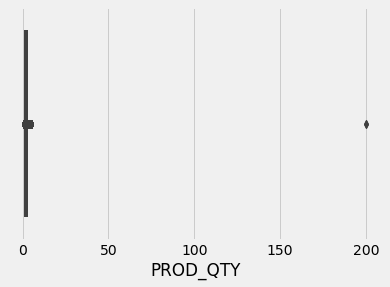

In [14]:
#See Outliers
sns.boxplot(transaction.PROD_QTY)

In [15]:
transaction[transaction.LYLTY_CARD_NBR==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Brand
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos


In [16]:
transaction.drop(transaction[transaction.LYLTY_CARD_NBR==226000].index,inplace=True)

##### -Here there is a customer who buy 200 quantity of Doritos chips .This is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.
 

In [17]:
#Describe data
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246739.000000,2.467390e+05,2.467390e+05,246739.000000,246739.000000,246739.000000,246739.000000
mean,135.050474,1.355304e+05,1.351305e+05,56.352259,1.906456,7.316118,175.583523
std,76.787105,8.071534e+04,7.814774e+04,33.695295,0.342500,2.474901,59.432239
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756850e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351820e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030835e+05,2.026525e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


After drop outlier , we see that max PROD_QTY = 5 and this is normal.

#### Missing Values

In [18]:
#See Missing Values
print(transaction.isna().sum())
print('*'*50)
print('Number of days in our data  {}'.format(transaction.DATE.nunique()))

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
Brand             0
dtype: int64
**************************************************
Number of days in our data  364


Wee see that there are not missing values in our available data . But this data is for transaction for one year so we explain that there is one missing values in our data .

In [19]:
transaction_per_date=pd.DataFrame({'DATE':pd.date_range(start='2018-07-01',end='2019-06-30',freq='D')})
transaction_per_date.set_index('DATE',inplace=True)
transaction_per_date['Number_Of_Transaction']=transaction.groupby('DATE')['TXN_ID'].count()

In [20]:
transaction_per_date

,Number_Of_Transaction
DATE,
2018-07-01,663.0
2018-07-02,650.0
2018-07-03,674.0
2018-07-04,669.0
2018-07-05,660.0
...,...
2019-06-26,657.0
2019-06-27,669.0
2019-06-28,673.0


<AxesSubplot:xlabel='DATE'>

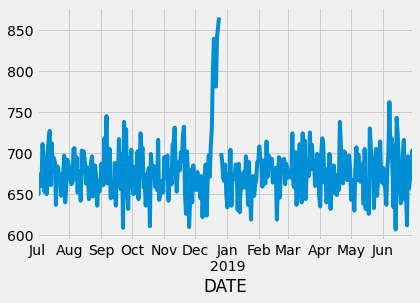

In [21]:
transaction_per_date.Number_Of_Transaction.plot()

We see that there are 0 selling in DEC month ,So We need to deep view so I will plot for December month only.

<AxesSubplot:xlabel='DATE'>

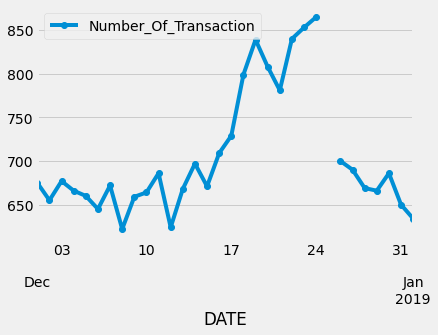

In [22]:
transaction_per_date.loc['2018-12-01':'2019-01-01'].plot(marker = 'o')


<AxesSubplot:xlabel='DATE'>

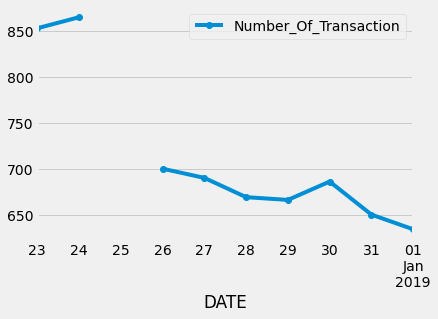

In [23]:
transaction_per_date.loc['2018-12-23':'2019-01-01'].plot(marker = 'o')


##### 25-12-2018 was a Christmas day , so the stores were closed and that is logical .

# Behaviour data 

In [24]:
#See first 5 rows
behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


#### Describe behaviour data

In [25]:
#Describe customer behaviour
behaviour.describe(include='O')

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


(-1.1188046814364117,
 1.108069852564394,
 -1.1117990223320766,
 1.1005618582062893)

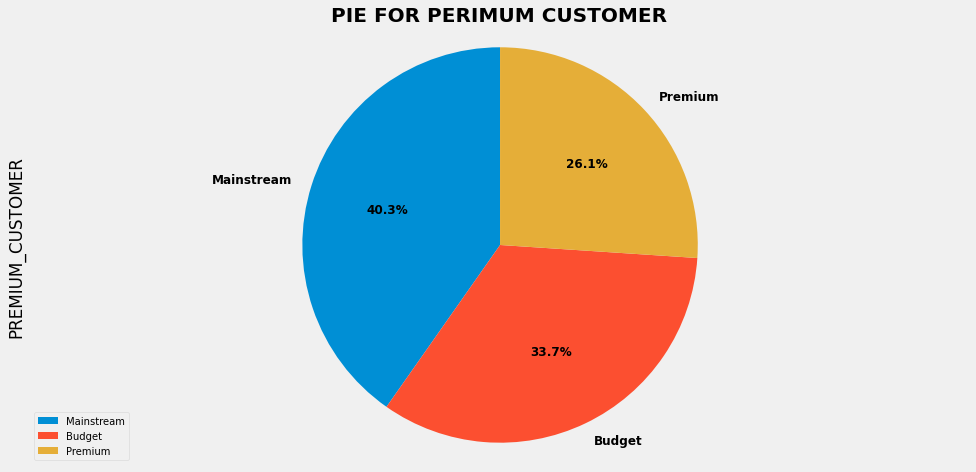

In [26]:
plt.figure(figsize=(15,7.5))

behaviour.PREMIUM_CUSTOMER.value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=3,fontsize=10)

plt.title('PIE FOR PERIMUM CUSTOMER',fontweight="bold",fontsize = 20)
plt.axis('equal')

##### Here we see that Mainstream is the most popular in our data.

(-1.120252551239829,
 1.1083112179310655,
 -1.105630540759744,
 1.1002681227912596)

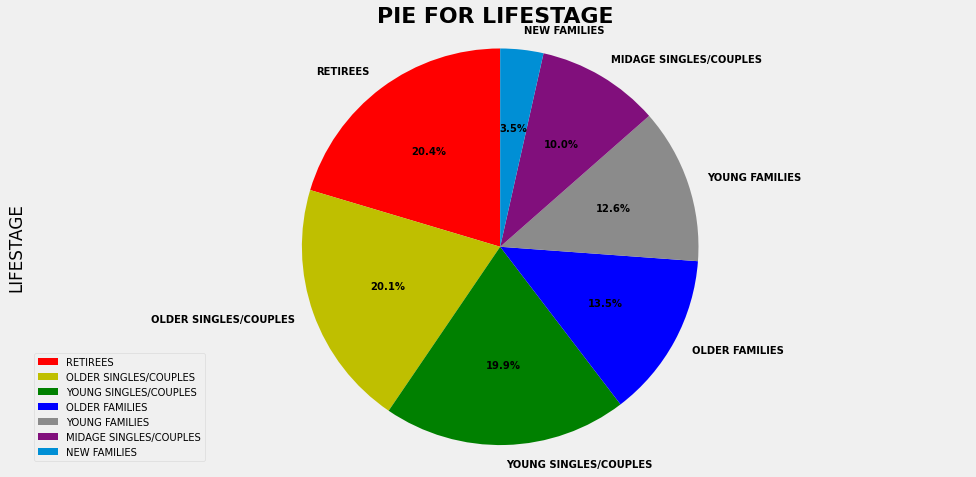

In [27]:
plt.figure(figsize=(15,7.5))

behaviour.LIFESTAGE.value_counts().plot(kind='pie',startangle=90,colors=['r','y','g','b','C4','C5','C6','C7'],autopct='%1.1f%%',textprops={'fontweight':'bold','fontsize': 10});
plt.legend(loc=3,fontsize=10)

plt.title('PIE FOR LIFESTAGE ',fontweight="bold",fontsize = 22)
plt.axis('equal')

##### Here we see that Retires and Older Singles /Couples are the most popular in our data.

# Merged Data

In [28]:
merged_data=pd.merge(transaction,behaviour,on='LYLTY_CARD_NBR',how='left')

In [29]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,19,19205,16466,26,Pringles Sweet Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1,180,Grain Waves,OLDER FAMILIES,Mainstream
2,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110,Infuzions,OLDER FAMILIES,Budget
3,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFeta Garlic 150g,2,9.2,150,Kettle,RETIREES,Premium
4,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream


In [30]:
merged_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
Brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [31]:
print(merged_data.shape)
merged_data.drop_duplicates(inplace=True)
print(merged_data.shape)

(246739, 12)
(246739, 12)


Now Let's get some insights from our data

### -Who spends the most on chips ,describing customers by lifestage?

In [32]:
grouped_data_tot_sales=pd.DataFrame(merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum())
grouped_data_tot_sales.sort_values('TOT_SALES',ascending=False)

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          156863.75
Mainstream       YOUNG SINGLES/COUPLES   147582.20
                 RETIREES                145168.95
Budget           YOUNG FAMILIES          129717.95
                 OLDER SINGLES/COUPLES   127833.60
Mainstream       OLDER SINGLES/COUPLES   124648.50
Premium          OLDER SINGLES/COUPLES   123531.55
Budget           RETIREES                105916.30
Mainstream       OLDER FAMILIES           96413.55
Premium          RETIREES                 91296.65
Mainstream       YOUNG FAMILIES           86338.25
                 MIDAGE SINGLES/COUPLES   84734.25
Premium          YOUNG FAMILIES           78571.70
                 OLDER FAMILIES           75242.60
Budget           YOUNG SINGLES/COUPLES    57122.10
Premium          MIDAGE SINGLES/COUPLES   54443.85
                 YOUNG SINGLES/COUPLES    39052.30
Budget           MIDAGE SINGLES/COUPLES   33345.70
                 NEW FAMILIES             20607.45
Mainstream       NEW FAMILIES             15979.70
Premium          NEW FAMILIES             10760.80

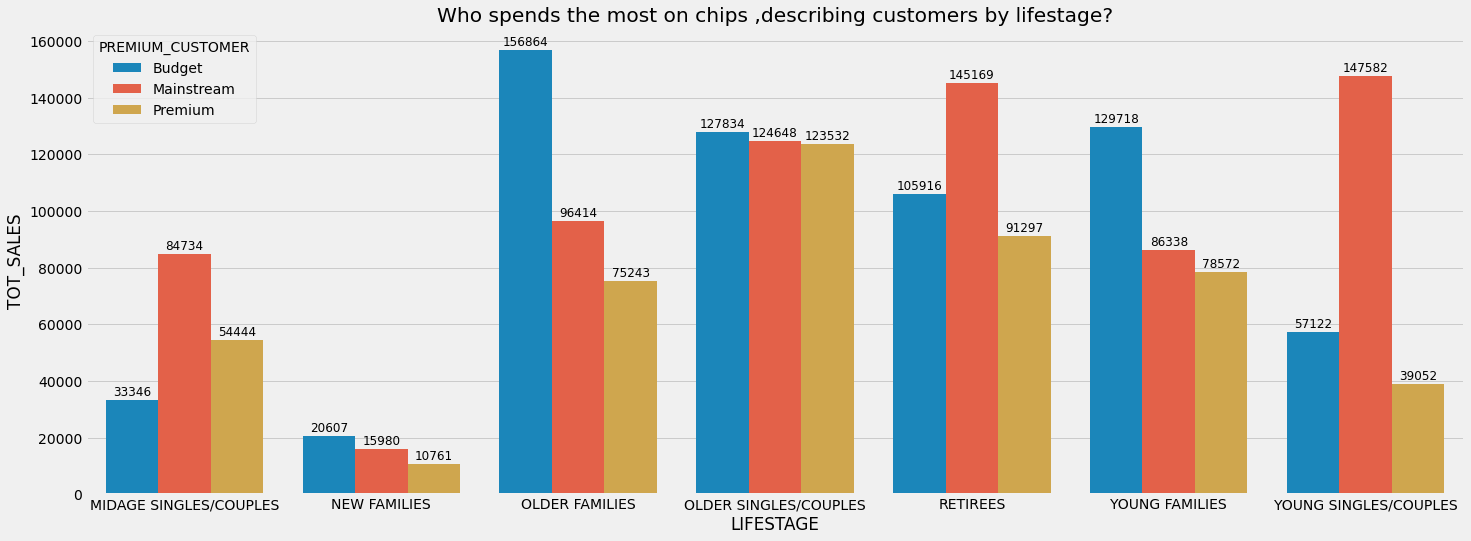

In [33]:

plt.figure(figsize=(22,8))
plots=sns.barplot(y=grouped_data_tot_sales.reset_index()['TOT_SALES'],x=grouped_data_tot_sales.reset_index()['LIFESTAGE'],hue=grouped_data_tot_sales.reset_index()['PREMIUM_CUSTOMER'])
#plt.xticks(rotation=90)
plt.title('Who spends the most on chips ,describing customers by lifestage?')
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(0, 8), 
                   textcoords='offset points')

### -How many customers are in each segment?

In [34]:
grouped_data_customers=pd.DataFrame(behaviour.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).count())
grouped_data_customers.columns=['Customers_numbers']
grouped_data_customers


Customers_numbers
PREMIUM_CUSTOMER LIFESTAGE                                
Budget           MIDAGE SINGLES/COUPLES               1504
                 NEW FAMILIES                         1112
                 OLDER FAMILIES                       4675
                 OLDER SINGLES/COUPLES                4929
                 RETIREES                             4454
                 YOUNG FAMILIES                       4017
                 YOUNG SINGLES/COUPLES                3779
Mainstream       MIDAGE SINGLES/COUPLES               3340
                 NEW FAMILIES                          849
                 OLDER FAMILIES                       2831
                 OLDER SINGLES/COUPLES                4930
                 RETIREES                             6479
                 YOUNG FAMILIES                       2728
                 YOUNG SINGLES/COUPLES                8088
Premium          MIDAGE SINGLES/COUPLES               2431
                 NEW FAMILIES                          588
                 OLDER FAMILIES                       2274
                 OLDER SINGLES/COUPLES                4750
                 RETIREES                             3872
                 YOUNG FAMILIES                       2433
                 YOUNG SINGLES/COUPLES                2574

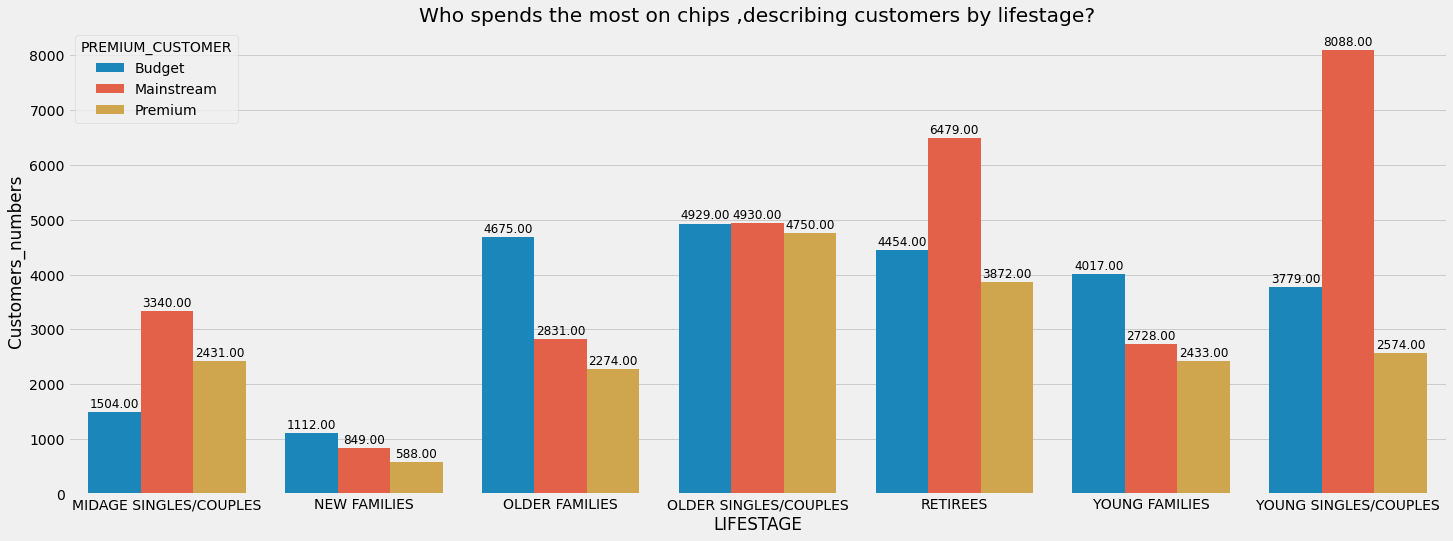

In [35]:
plt.figure(figsize=(22,8))
plots=sns.barplot(y=grouped_data_customers.reset_index()['Customers_numbers'],x=grouped_data_customers.reset_index()['LIFESTAGE'],hue=grouped_data_customers.reset_index()['PREMIUM_CUSTOMER'])

plt.title('Who spends the most on chips ,describing customers by lifestage?')
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(0, 8), 
                   textcoords='offset points')

### - How many chips are bought per customer by segment?



In [36]:

boughted_chips_per_segment=pd.DataFrame(merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].count().sort_values(ascending=False))
boughted_chips_per_segment

PROD_QTY
PREMIUM_CUSTOMER LIFESTAGE                       
Budget           OLDER FAMILIES             21514
Mainstream       RETIREES                   19970
                 YOUNG SINGLES/COUPLES      19544
Budget           YOUNG FAMILIES             17763
                 OLDER SINGLES/COUPLES      17172
Mainstream       OLDER SINGLES/COUPLES      17061
Premium          OLDER SINGLES/COUPLES      16559
Budget           RETIREES                   14225
Mainstream       OLDER FAMILIES             13241
Premium          RETIREES                   12236
Mainstream       YOUNG FAMILIES             11947
                 MIDAGE SINGLES/COUPLES     11095
Premium          YOUNG FAMILIES             10784
                 OLDER FAMILIES             10403
Budget           YOUNG SINGLES/COUPLES       8573
Premium          MIDAGE SINGLES/COUPLES      7612
                 YOUNG SINGLES/COUPLES       5852
Budget           MIDAGE SINGLES/COUPLES      4691
                 NEW FAMILIES                2824
Mainstream       NEW FAMILIES                2185
Premium          NEW FAMILIES                1488

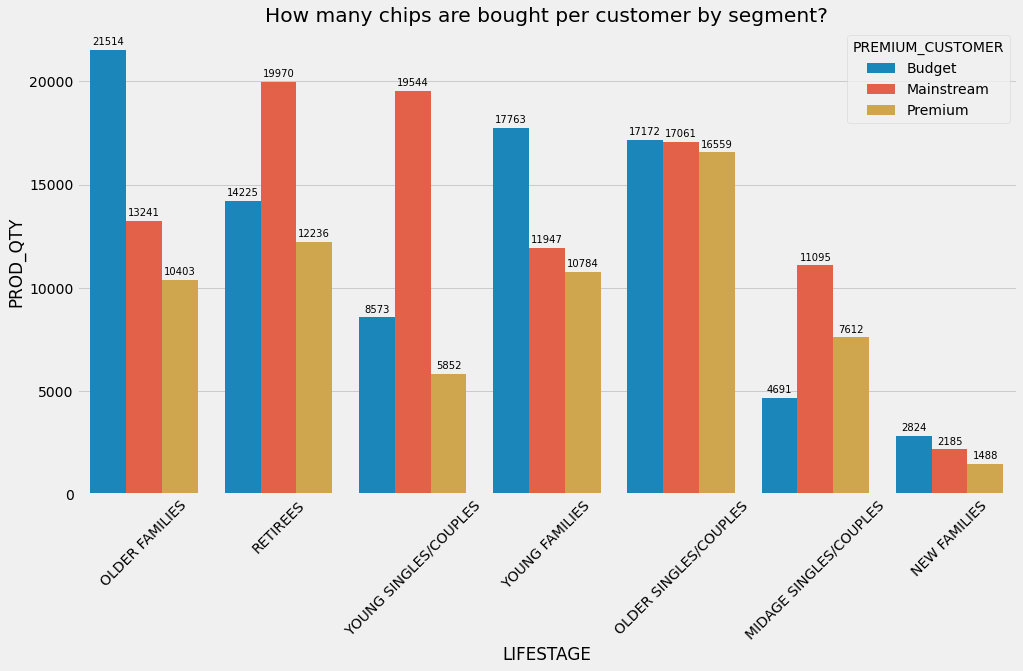

In [37]:
plt.figure(figsize=(15,8))
plots=sns.barplot(y=boughted_chips_per_segment.reset_index()['PROD_QTY'],x=boughted_chips_per_segment.reset_index()['LIFESTAGE'],hue=boughted_chips_per_segment.reset_index()['PREMIUM_CUSTOMER'])
plt.xticks(rotation=45)
plt.title('How many chips are bought per customer by segment?')
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points')

###  -What's the average chip price by customer segment?


In [38]:
#Get each price of one unit of each products 
merged_data['UNIT_PRICE']=merged_data.TOT_SALES/merged_data.PROD_QTY

In [39]:

avg_chips_price_per_segment=pd.DataFrame(merged_data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['UNIT_PRICE'].mean().sort_values(ascending=False))
avg_chips_price_per_segment

UNIT_PRICE
PREMIUM_CUSTOMER LIFESTAGE                         
Mainstream       YOUNG SINGLES/COUPLES     4.065642
                 MIDAGE SINGLES/COUPLES    3.994241
Budget           RETIREES                  3.924404
Premium          RETIREES                  3.920942
Budget           NEW FAMILIES              3.917688
Mainstream       NEW FAMILIES              3.916133
Premium          OLDER SINGLES/COUPLES     3.893236
Budget           OLDER SINGLES/COUPLES     3.882096
Premium          NEW FAMILIES              3.872110
Mainstream       RETIREES                  3.844294
                 OLDER SINGLES/COUPLES     3.814665
Premium          MIDAGE SINGLES/COUPLES    3.770698
                 YOUNG FAMILIES            3.762150
Budget           YOUNG FAMILIES            3.760737
                 OLDER FAMILIES            3.745340
                 MIDAGE SINGLES/COUPLES    3.743328
Mainstream       OLDER FAMILIES            3.737077
                 YOUNG FAMILIES            3.724533
Premium          OLDER FAMILIES            3.717000
                 YOUNG SINGLES/COUPLES     3.665414
Budget           YOUNG SINGLES/COUPLES     3.657366

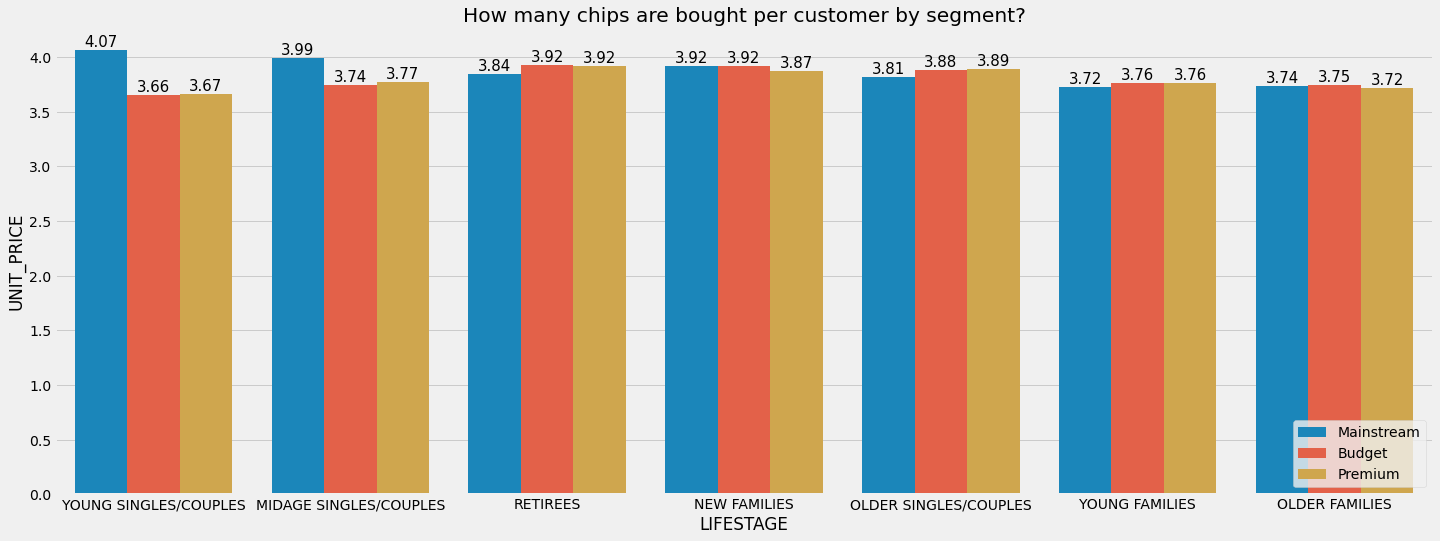

In [40]:
plt.figure(figsize=(22,8))
plots=sns.barplot(y=avg_chips_price_per_segment.reset_index()['UNIT_PRICE'],x=avg_chips_price_per_segment.reset_index()['LIFESTAGE'],hue=avg_chips_price_per_segment.reset_index()['PREMIUM_CUSTOMER'])

plt.title('How many chips are bought per customer by segment?')
plt.legend(loc='lower right')
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points')


<AxesSubplot:>

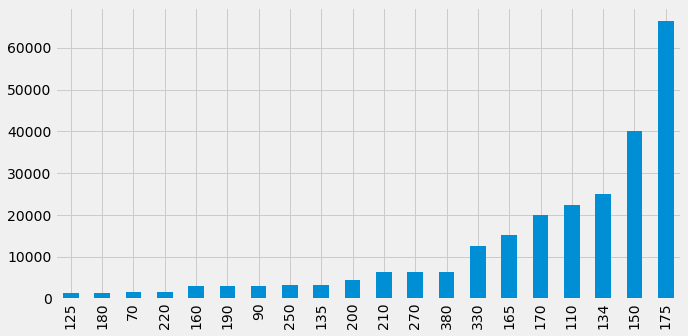

In [41]:
transaction["PACK_SIZE"].value_counts(ascending=True).plot.bar(figsize=(10,5))


<AxesSubplot:>

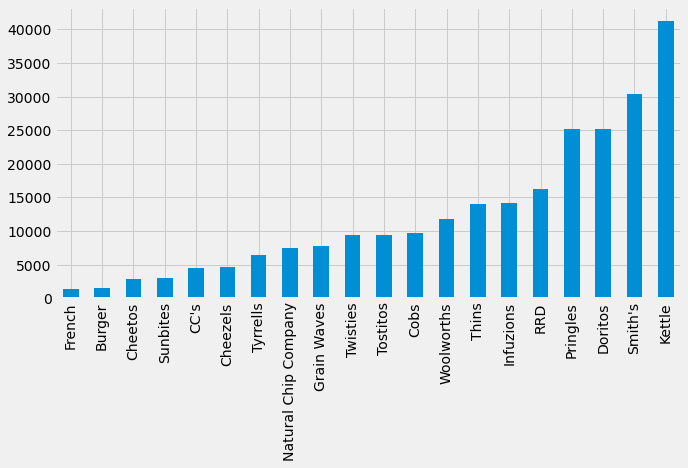

In [42]:
transaction["Brand"].value_counts(ascending=True).plot.bar(figsize=(10,5))


## T-Test

In [43]:
from scipy.stats import ttest_ind

In [44]:
#Mainstream vs Perimum
ttest_ind([4.065642,3.994241],[3.665414,3.770698])

Ttest_indResult(statistic=4.903408005498769, pvalue=0.039164352682153285)

In [45]:
#Mainstream vs Budget
ttest_ind([4.065642,3.994241],[3.657366,3.743328])

Ttest_indResult(statistic=5.898899732826305, pvalue=0.027555775534860754)

In [46]:
# Filter customer segment for (Mainstream with 'Young singles/Couples' and 'MidAge') to match Most Brand , Packet_size of them
Customer_Target=pd.DataFrame(merged_data.query("PREMIUM_CUSTOMER=='Mainstream' & LIFESTAGE==['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES']"))
Customer_Target[['PREMIUM_CUSTOMER','LIFESTAGE','Brand','PACK_SIZE']].head()

,PREMIUM_CUSTOMER,LIFESTAGE,Brand,PACK_SIZE
12,Mainstream,MIDAGE SINGLES/COUPLES,Tostitos,175
53,Mainstream,YOUNG SINGLES/COUPLES,Tostitos,175
55,Mainstream,YOUNG SINGLES/COUPLES,Kettle,150
60,Mainstream,YOUNG SINGLES/COUPLES,Pringles,134
72,Mainstream,YOUNG SINGLES/COUPLES,Twisties,270


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '(Mainstream, YOUNG SINGLES/COUPLES, Kettle)'),
  Text(1, 0, '(Mainstream, YOUNG SINGLES/COUPLES, Doritos)'),
  Text(2, 0, '(Mainstream, YOUNG SINGLES/COUPLES, Pringles)'),
  Text(3, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, Kettle)'),
  Text(4, 0, "(Mainstream, YOUNG SINGLES/COUPLES, Smith's)"),
  Text(5, 0, "(Mainstream, MIDAGE SINGLES/COUPLES, Smith's)"),
  Text(6, 0, '(Mainstream, YOUNG SINGLES/COUPLES, Infuzions)'),
  Text(7, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, Doritos)'),
  Text(8, 0, '(Mainstream, YOUNG SINGLES/COUPLES, Thins)'),
  Text(9, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, Pringles)'),
  Text(10, 0, '(Mainstream, YOUNG SINGLES/COUPLES, Twisties)'),
  Text(11, 0, '(Mainstream, YOUNG SINGLES/COUPLES, Tostitos)'),
  Text(12, 0, '(Mainstream, YOUNG SINGLES/COUPLES, RRD)'),
  T

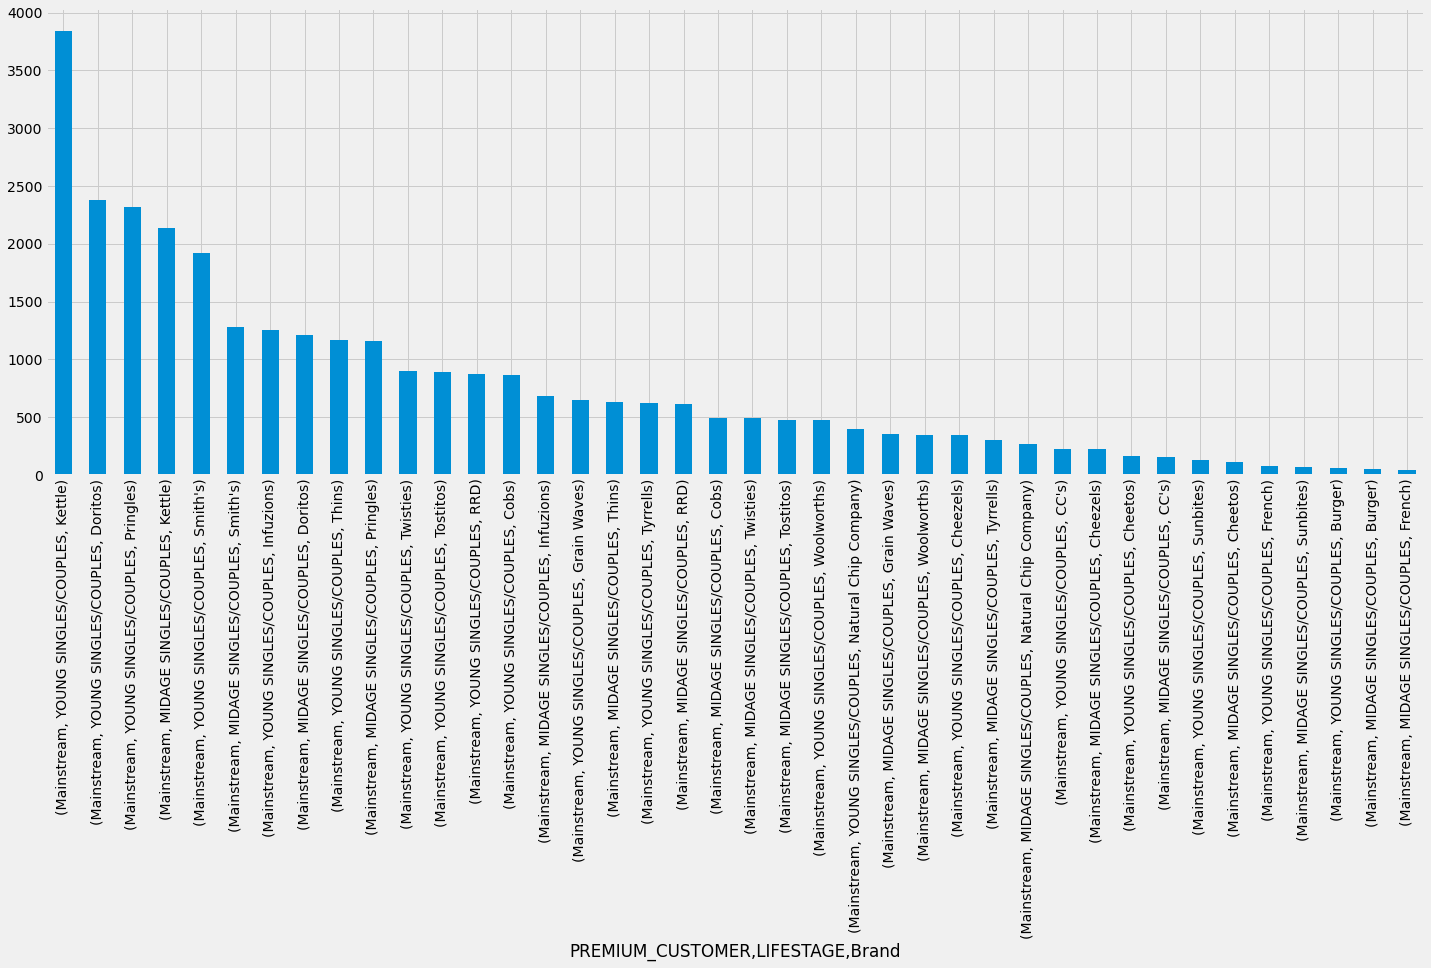

In [47]:
plt.figure(figsize=(22,8))
Customer_Target.groupby(['PREMIUM_CUSTOMER','LIFESTAGE','Brand'])['Brand'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '(Mainstream, YOUNG SINGLES/COUPLES, 175)'),
  Text(1, 0, '(Mainstream, YOUNG SINGLES/COUPLES, 150)'),
  Text(2, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, 175)'),
  Text(3, 0, '(Mainstream, YOUNG SINGLES/COUPLES, 134)'),
  Text(4, 0, '(Mainstream, YOUNG SINGLES/COUPLES, 110)'),
  Text(5, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, 150)'),
  Text(6, 0, '(Mainstream, YOUNG SINGLES/COUPLES, 170)'),
  Text(7, 0, '(Mainstream, YOUNG SINGLES/COUPLES, 330)'),
  Text(8, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, 134)'),
  Text(9, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, 110)'),
  Text(10, 0, '(Mainstream, YOUNG SINGLES/COUPLES, 165)'),
  Text(11, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, 170)'),
  Text(12, 0, '(Mainstream, MIDAGE SINGLES/COUPLES, 330)'),
  Text(13, 0, '(Mainstream, MIDAGE SINGLES/COUPLES,

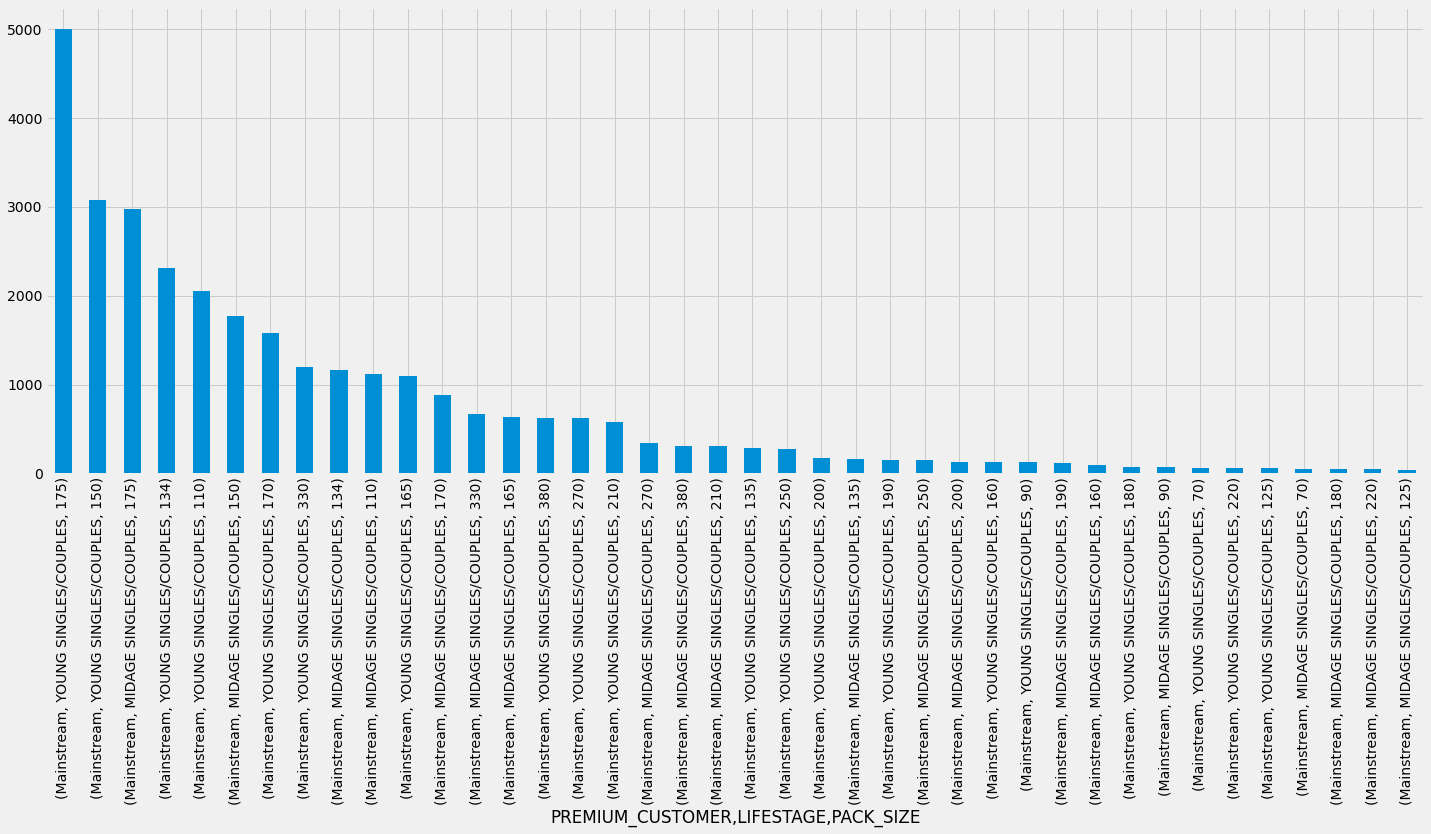

In [48]:
plt.figure(figsize=(22,8))
Customer_Target.groupby(['PREMIUM_CUSTOMER','LIFESTAGE','PACK_SIZE'])['PACK_SIZE'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)

In [49]:
from mlxtend.frequent_patterns import apriori

In [50]:
merged_data.sort_values(by='LYLTY_CARD_NBR')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Brand,LIFESTAGE,PREMIUM_CUSTOMER,UNIT_PRICE
73419,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Company,YOUNG SINGLES/COUPLES,Premium,3.0
52496,2018-09-16,1,1002,2,58,Red Rock Deli Chikn Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2.7
168338,2019-03-07,1,1003,3,52,Grain Waves Sour Cream Chives 210G,1,3.6,210,Grain Waves,YOUNG FAMILIES,Budget,3.6
169067,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,Natural Chip Company,YOUNG FAMILIES,Budget,3.0
84124,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,160,Woolworths,OLDER SINGLES/COUPLES,Mainstream,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22576,2018-08-03,88,2370651,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,380,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,6.5
108044,2018-12-08,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,Grain Waves,YOUNG FAMILIES,Mainstream,3.6
62276,2018-10-01,88,2370751,240394,60,Kettle Tortilla ChpsFeta Garlic 150g,2,9.2,150,Kettle,YOUNG FAMILIES,Premium,4.6
78286,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,Tyrrells,OLDER FAMILIES,Budget,4.2


In [51]:
merged_data.groupby(['TXN_ID','Brand'])['PROD_QTY'].sum()

TXN_ID   Brand               
1        Natural Chip Company    2
2        RRD                     1
3        Grain Waves             1
4        Natural Chip Company    1
5        Woolworths              1
                                ..
270206   Tyrrells                2
270207   Cobs                    2
270208   Pringles                2
270209   Thins                   2
2415841  Kettle                  2
Name: PROD_QTY, Length: 246621, dtype: int64

In [52]:
basket=merged_data.groupby(['LYLTY_CARD_NBR','Brand'])['PROD_QTY'].sum().unstack().fillna(0)
basket

Brand,Burger,CC's,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chip Company,Pringles,RRD,Smith's,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370651,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2370701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2370751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
def reducer(x):
    if x <= 0:
        return 0
    else:
        return 1
basket=basket.applymap(reducer)
basket

Brand,Burger,CC's,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chip Company,Pringles,RRD,Smith's,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1005,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370651,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2370701,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2370751,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [54]:
frequent=apriori(basket,0.1,use_colnames=True).sort_values(by='support',ascending=False)
frequent

,support,itemsets
4,0.423303,(Kettle)
7,0.314896,(Smith's)
1,0.290446,(Doritos)
5,0.289772,(Pringles)
6,0.180103,(RRD)
3,0.177311,(Infuzions)
8,0.176624,(Thins)
11,0.139661,(Woolworths)
12,0.136420,"(Kettle, Doritos)"
13,0.135452,"(Kettle, Pringles)"


In [55]:

from mlxtend.frequent_patterns import association_rules
association_rules(frequent,metric='lift',min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kettle),(Doritos),0.423303,0.290446,0.136420,0.322276,1.109591,0.013474,1.046966
1,(Doritos),(Kettle),0.290446,0.423303,0.136420,0.469693,1.109591,0.013474,1.087478
2,(Kettle),(Pringles),0.423303,0.289772,0.135452,0.319989,1.104279,0.012791,1.044436
3,(Pringles),(Kettle),0.289772,0.423303,0.135452,0.467444,1.104279,0.012791,1.082886
4,(Kettle),(Smith's),0.423303,0.314896,0.135130,0.319227,1.013754,0.001833,1.006362
5,(Smith's),(Kettle),0.314896,0.423303,0.135130,0.429125,1.013754,0.001833,1.010199


##### That's meaning if we target Brands such 'Doritos' we will find there is a 46% higher chance that the Customers will buy 'Kettle' with it